Import of requisite Python Libraries to formulate the said models and Dataset import

In [23]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import random
import statistics
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor

# Import of Performance metric functions from the Scikit-Learn Library to assess models' performance

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score



In [24]:
cd = pd.read_excel("Concrete_Data.xls")

In [25]:
print(len(cd))
cd.head(10)


1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [26]:
cd.columns = ['cement_component', 'furnace_slag', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_percentage', 'fine_aggregate', 'age', 'concrete_strength']

In [27]:
cd.head(10)

,cement_component,furnace_slag,fly_ash,water_component,superplasticizer,coarse_percentage,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


Scatter plot to visualize the relations between the Concrete Strength and other factors


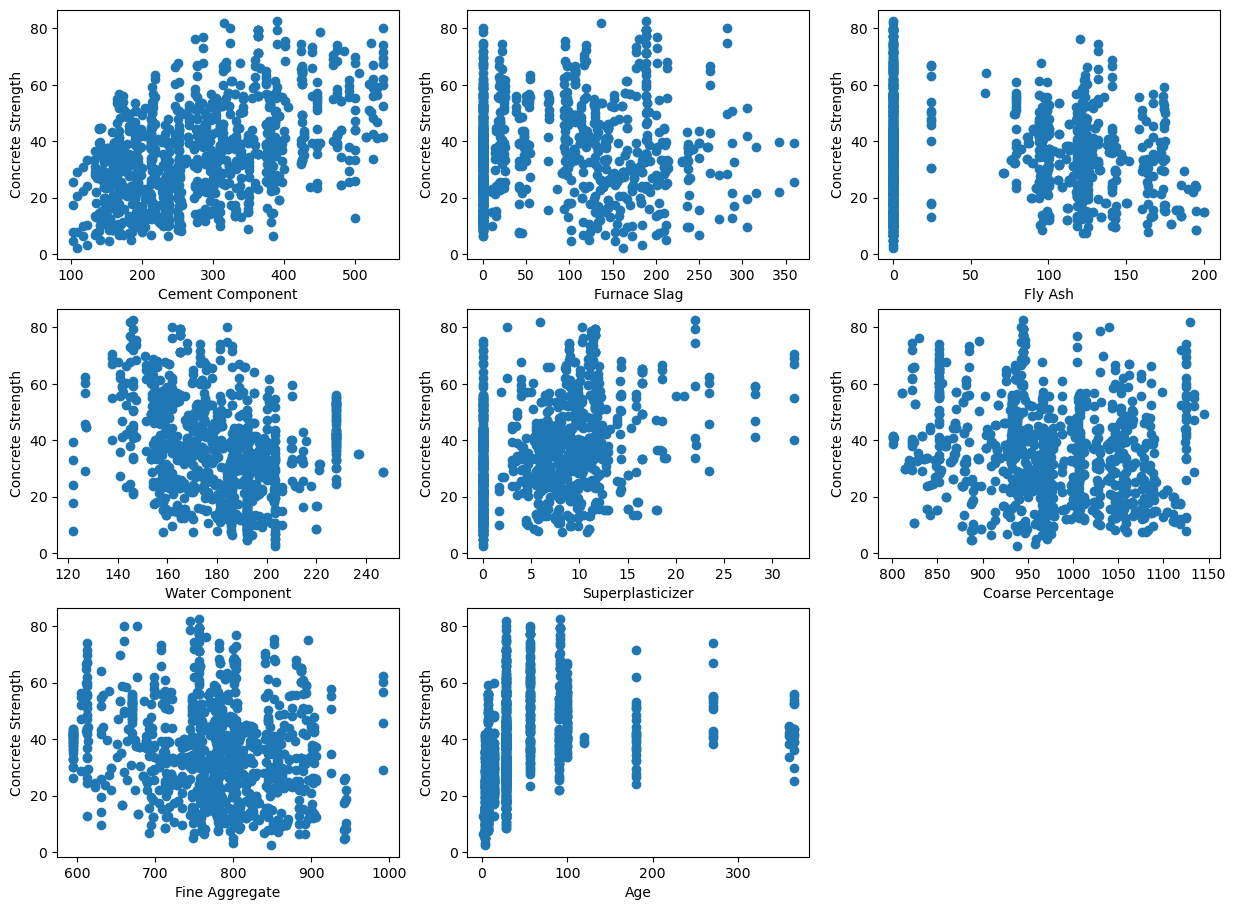

In [28]:
plt.figure(figsize = (15, 11))
plot_count = 1

for feature in list(cd.columns)[:-1]:
    plt.subplot(3,3, plot_count)
    plt.scatter(cd[feature], cd['concrete_strength'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete Strength')
    plot_count += 1

plt.show()

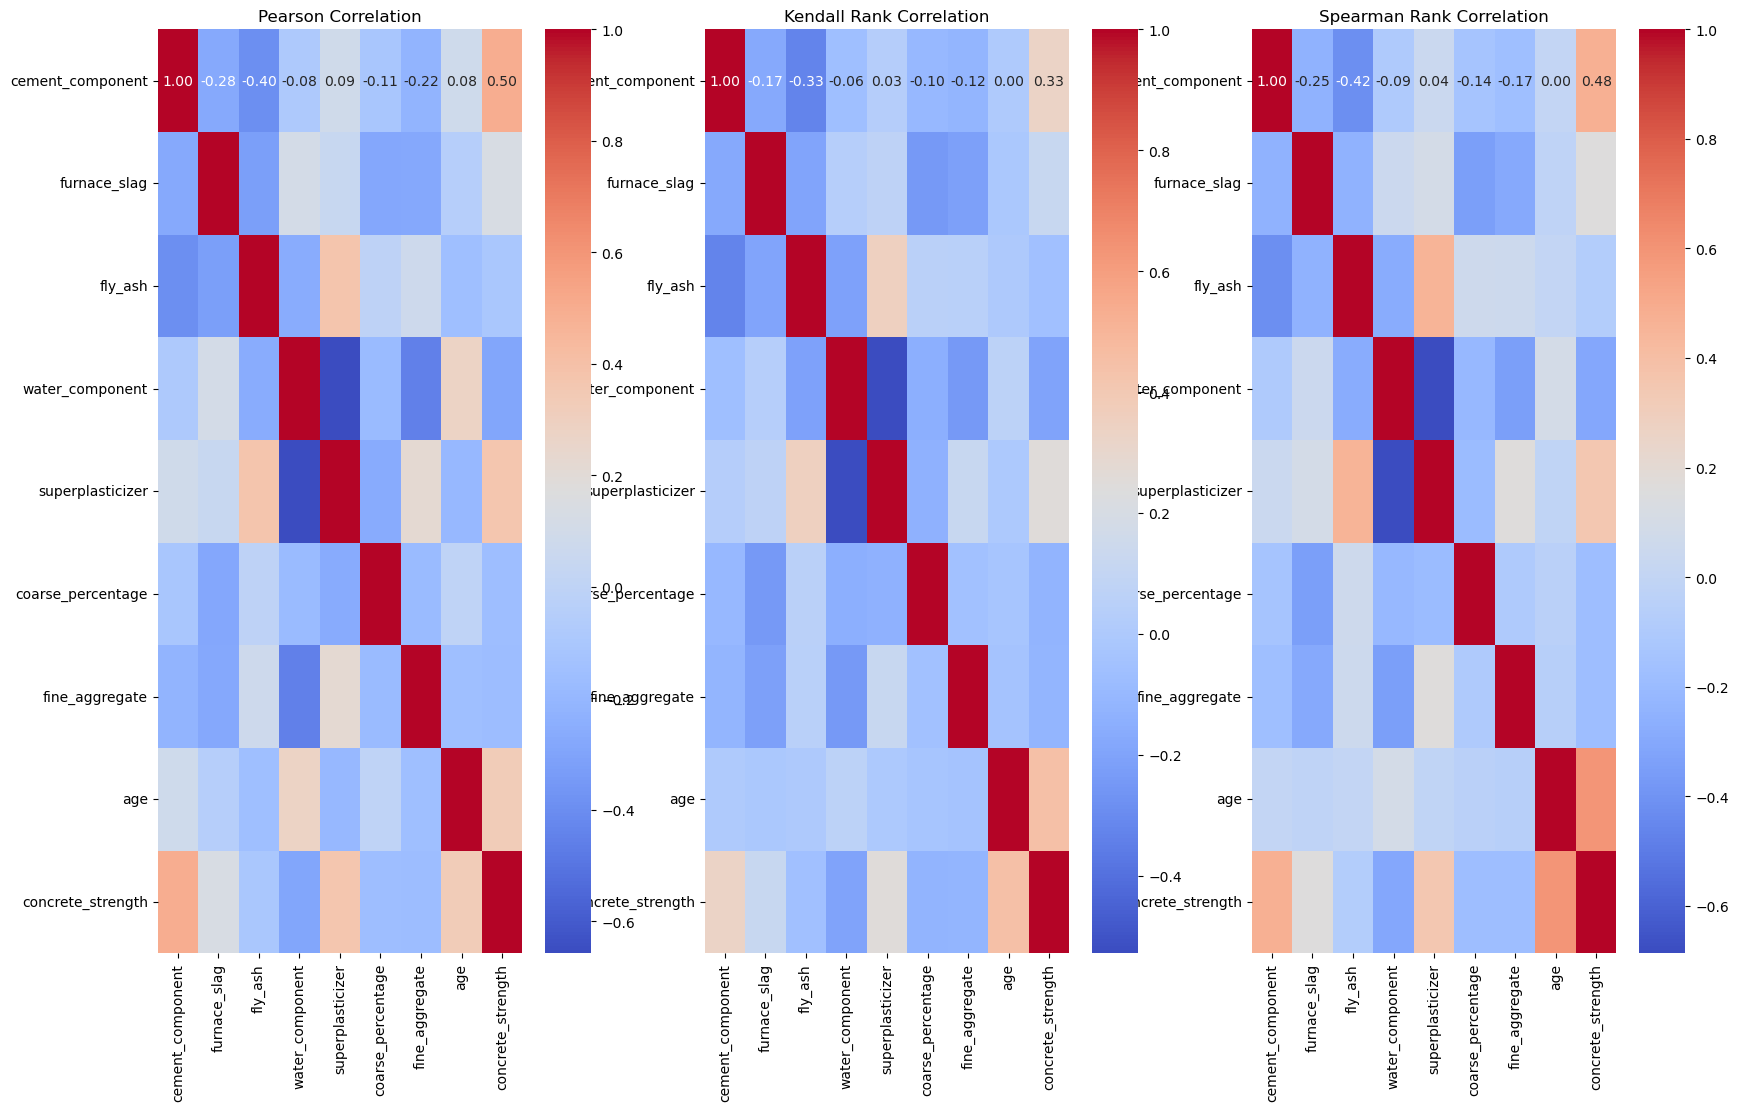

In [29]:
# Calculate Pearson correlation matrix
pearson_corr = cd.corr(method='pearson')

# Calculate Kendall Rank correlation matrix
kendall_corr = cd.corr(method='kendall')

# Calculate Spearman Rank correlation matrix
spearman_corr = cd.corr(method='spearman')

# Create subplots for correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 12))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Plot Kendall Rank correlation matrix
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Kendall Rank Correlation')

# Plot Spearman Rank correlation matrix
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2])
axes[2].set_title('Spearman Rank Correlation')


# Show the plots
plt.show()

In [30]:
#Function definition for splitting the dataset into training and test subsets
# 70 % of the dataset will be used to train the models, and the rest will be used to test and assess the model's performance 

def split_train_test(data, feature, train_index = 0.7):
    train, test = train_test_split(cd, test_size = 1-train_index)

    if type(feature) ==list:
        x_train = train[feature].as_matrix()
        y_train = train['concrete_strength'].as_matrix()

        x_test = test[feature].as_matrix()
        y_test = test['concrete_strength'].as_matrix()

    else:
        x_train = [[x] for x in list(train[feature])]
        y_train = [[x] for x in list(train['concrete_strength'])]

        x_test = [[x] for x in list(test[feature])]
        y_test = [[x] for x in list(test['concrete_strength'])]

    return x_train, y_train, x_test, y_test

    

The subsquent code aims to implement a Single Linear Regression Model with the inducted Dataset


cement_component 0.29137660139881827
fly_ash 0.008710518478524776
water_component 0.09344577732916348
superplasticizer 0.1605360056371049
coarse_percentage 0.04046353241551448


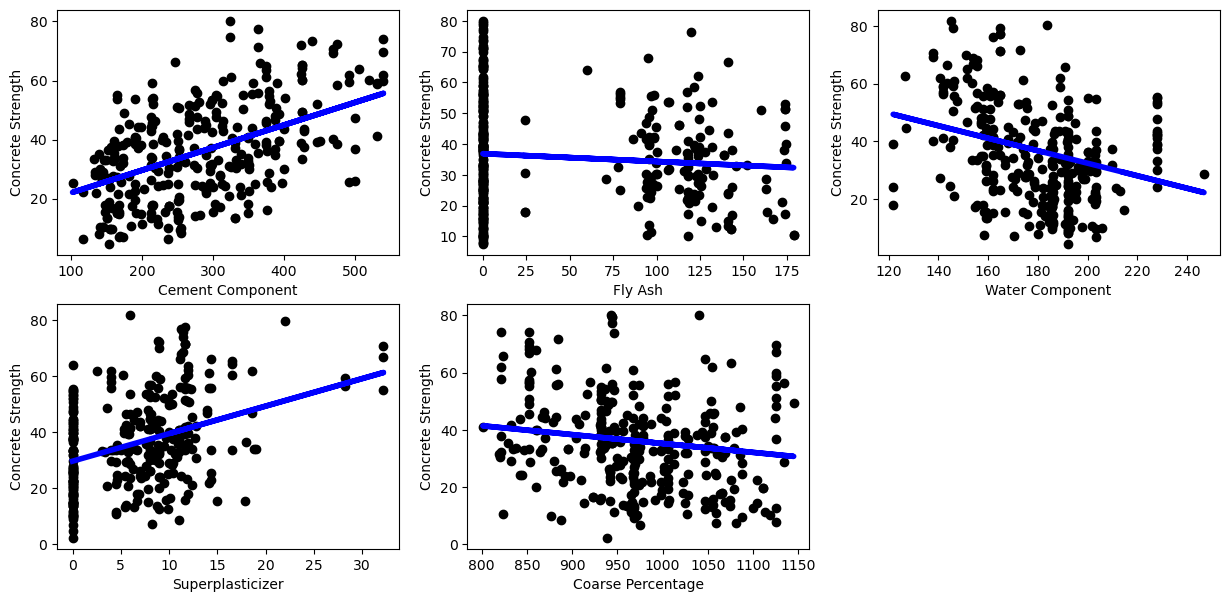

In [35]:
plt.figure(figsize = (15,7))
plot_count = 1

for feature in ['cement_component', 'fly_ash', 'water_component', 'superplasticizer', 'coarse_percentage']:
    cd_tr = cd[['concrete_strength', feature]]
    cd_tr = cd_tr[(cd_tr.T !=0).all()]

    x_train, y_train, x_test, y_test = split_train_test(cd_tr, feature)

    #Creation of a Linear Regressor Object

    regr = LinearRegression()

    #Train the model using the given dataset
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)

    #Plot the set of outputs

    plt.subplot(2, 3, plot_count)

    plt.scatter(x_test, y_test, color ='black')
    plt.plot(x_test, y_pred, color = 'blue', linewidth= 4)
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete Strength')

    print (feature, r2_score(y_test, y_pred))

    plot_count += 1

plt.show()

